## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
tf.keras.backend.clear_session()

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

### Find no.of samples are there in training and test datasets

In [0]:
#Number of samples available in training dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))

In [85]:
#Number of samples available in test dataset
print('Train: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(10000, 28, 28), y=(10000,)


### Find dimensions of an image in the dataset

In [86]:
# Find the dimension of first data from training
x_train[0,:,:].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
# one hot encode training values
y_train = tf.keras.utils.to_categorical(y_train)

In [0]:
# one hot encode test values
y_test = tf.keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# First convert train and test data to float
TrainX = x_train.astype('float32')
TestX = x_test.astype('float32')

In [0]:
# Now convert the data to 0-1
TrainX = TrainX/255.0
TestX = TestX/255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
TrainX = TrainX.reshape((TrainX.shape[0], 28, 28, 1))
TestX = TestX.reshape((TestX.shape[0], 28, 28, 1))

### Import the necessary layers from keras to build the model

In [0]:
#Define some parameters
img_size = 28
img_depth = 1
batchsize = 32

In [0]:
tf.keras.backend.clear_session()

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [100]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(TrainX,y_train,          
          validation_data=(TestX,y_test),
          epochs=10,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3754 - acc: 0.8654 - val_loss: 0.2956 - val_acc: 0.8910
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2318 - acc: 0.9146 - val_loss: 0.2512 - val_acc: 0.9111
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1698 - acc: 0.9357 - val_loss: 0.2457 - val_acc: 0.9126
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1172 - acc: 0.9567 - val_loss: 0.2905 - val_acc: 0.9093
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0782 - acc: 0.9706 - val_loss: 0.3290 - val_acc: 0.9092
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0527 - acc: 0.9810 - val_loss: 0.3658 - val_acc: 0.9162
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0385 - acc: 0.9867 - val_l

In [0]:
#from tf.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [104]:

model.fit(TrainX,y_train,          
          validation_data=(TestX,y_test),
          epochs=10,
          batch_size = 32,
          callbacks= [es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0169 - acc: 0.9941 - val_loss: 0.5644 - val_acc: 0.9104
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0163 - acc: 0.9944 - val_loss: 0.6883 - val_acc: 0.9086
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0143 - acc: 0.9952 - val_loss: 0.6160 - val_acc: 0.9090
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0138 - acc: 0.9950 - val_loss: 0.6743 - val_acc: 0.9122
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0123 - acc: 0.9959 - val_loss: 0.6535 - val_acc: 0.9129
Epoch 6/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0107 - acc: 0.9964 - val_loss: 0.7649 - val_acc: 0.9127


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [105]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
# Define input layer
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,1,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [106]:
model.fit(TrainX,y_train,          
          validation_data=(TestX,y_test),
          epochs=10,
          batch_size = 32) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3686 - acc: 0.8673 - val_loss: 0.2819 - val_acc: 0.8961
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2429 - acc: 0.9107 - val_loss: 0.2413 - val_acc: 0.9115
Epoch 3/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1962 - acc: 0.9260 - val_loss: 0.2253 - val_acc: 0.9195
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1615 - acc: 0.9391 - val_loss: 0.2265 - val_acc: 0.9216
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1352 - acc: 0.9490 - val_loss: 0.2305 - val_acc: 0.9256
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1122 - acc: 0.9566 - val_loss: 0.2497 - val_acc: 0.9228
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0945 - acc: 0.9644 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
datagen.fit(TrainX)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

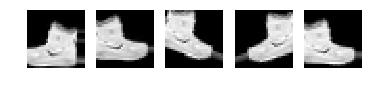

In [108]:
from matplotlib import pyplot as plt
gen = datagen.flow(TrainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
import numpy as np

img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)  
img_generator.fit(TrainX)

In [110]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
# Define input layer
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,1,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [111]:
model.fit_generator(img_generator.flow(TrainX, y_train, batch_size = 32), 
                          epochs=50,
                          steps_per_epoch= TrainX.shape[0]//batchsize,
                          validation_data=(TestX, y_test),
                          validation_steps = TestX.shape[0]//batchsize)

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7972 - acc: 0.7026 - val_loss: 0.6096 - val_acc: 0.7618
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6016 - acc: 0.7735 - val_loss: 0.5138 - val_acc: 0.8022
Epoch 3/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5391 - acc: 0.7981 - val_loss: 0.4494 - val_acc: 0.8340
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4985 - acc: 0.8145 - val_loss: 0.4886 - val_acc: 0.8177
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4797 - acc: 0.8233 - val_loss: 0.3973 - val_acc: 0.8569
Epoch 6/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4598 - acc: 0.8286 - val_loss: 0.4206 - val_acc: 0.8454
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4474 - acc: 0.8344 - val_loss: 0.4112 - val_acc: 0.8505
Epoch 8/50
1875/1875 [==========================

###  Report the final train and validation accuracy

In [116]:
scores = model.evaluate(TestX, y_test)
scores[1]*100

10000/10000 [==============================] - 1s 80us/sample - loss: 0.2950 - acc: 0.8943


89.42999839782715

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

### **Load CIFAR10 dataset**

In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [131]:
# The data, split between train and test sets:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
print('x_train shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
def batch_generator(df, batchsize=32, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    img_generator.fit(xtrain)    

### **Prepare/fit the generator.**

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
model.fit_generator(img_generator.flow(xtrain, ytrain, batch_size = 32), 
                          epochs=10,
                          steps_per_epoch= xtrain.shape[0]//batchsize,
                          validation_data=(xtest,ytest),
                          validation_steps = xtest.shape[0]//batchsize)

Epoch 1/10
1562/1562 [==============================] - 26s 16ms/step - loss: 1.7084 - acc: 0.3165 - val_loss: 1.3257 - val_acc: 0.5238
Epoch 2/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.4670 - acc: 0.4588 - val_loss: 1.1965 - val_acc: 0.5669
Epoch 3/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.3842 - acc: 0.4958 - val_loss: 1.2003 - val_acc: 0.5661
Epoch 4/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.3351 - acc: 0.5186 - val_loss: 1.1098 - val_acc: 0.5994
Epoch 5/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.2927 - acc: 0.5370 - val_loss: 1.1044 - val_acc: 0.6070
Epoch 6/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.2637 - acc: 0.5507 - val_loss: 1.0984 - val_acc: 0.6160
Epoch 7/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.2372 - acc: 0.5533 - val_loss: 1.0546 - val_acc: 0.6296
Epoch 8/10
1562/1562 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

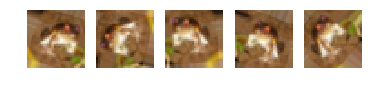

In [55]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()